### Task 1 - Data Collection
Here you will obtain the required data for the analysis. As described in the project instructions, you will perform a web scrap to obtain data from the NCDC website, import data from the John Hopkins repository, and import the provided external data.


### A - NCDC Website scrap
Website - https://covid19.ncdc.gov.ng/

In [125]:
## Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [126]:
# Assign the url of the webpage to a variable
url = 'https://covid19.ncdc.gov.ng/'

#Assign the result of a request of the webpage to a variable using requests.get() method
extract = requests.get(url)

#Get the status_code of the feedback. Status_code that begins with 2 generally indicate success.
print(extract.status_code)

200


In [127]:
#Read the text-based contents of the web files
#To make the text more readable than the way it comes from the request modules, 
#BeautifulSoup module will be used to parse data from the html files
soup = BeautifulSoup(extract.text,"html.parser")

In [128]:
#Extract from the web file, table with id:custom1 using BeautifulSoup's findAll() method
table = soup.findAll('table',{"id":"custom1"})[0]
values =[]

In [129]:
#Extract the table rows from the table with list 'tr' argument in table.findAll() method
tr = table.findAll(['tr'])

In [130]:
#Create a csv file 'nig_covid.csv' and open in append mode
csvFile = open("nig_covid.csv",'wt',newline='',encoding='utf-8')

#Write the extracted data to the file using the .writer()method
writer = csv.writer(csvFile)  

#Use for loop to extract all the table_head 'th' and table_data 'td' from the table
#Remove the newline in the text column of 'th' using strip() method
#Replace the newline in 'td' with space(' ') using replace() method
#Write data into the file with writereow() method
try:   
        for cell in tr:
            th = cell.find_all('th')
            th_data = [col.text.strip('\n') for col in th]
            td = cell.find_all('td')
            row = [i.text.replace('\n','') for i in td]
            writer.writerow(th_data+row)      

#Close the csvFile from append mode        
finally:   
    csvFile.close()

In [131]:
# Save the data to a DataFrame object.
dfcov = pd.read_csv('nig_covid.csv')

In [132]:
dfcov.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,...,"98,318 ...","17,483 ...","80,066 ...",769
1,...,"28,165 ...",947,"26,971 ...",247
2,...,"16,421 ...",164,"16,103 ...",154
3,...,"11,175 ...",29,"11,058 ...",88
4,...,"10,227 ...",3,"10,149 ...",75


### B - John Hopkins Data Repository
Here you will obtain data from the John Hopkins repository. Your task here involves saving the data from the GitHub repo link to DataFrame for further analysis. Find the links below. 
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [133]:
#Save the data from John Hopkins repository raw link into a DataFrame
global_confirmed_cases = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_global_confirmed_cases = pd.read_csv(global_confirmed_cases)


global_recovered_cases = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_global_recovered_cases = pd.read_csv(global_recovered_cases)


global_deaths_cases = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_global_deaths_cases = pd.read_csv(global_deaths_cases)



### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [134]:
#Save the external data to a DataFrame using pd.read_csv() method
df_external_data = pd.read_csv('covid_external.csv')


In [135]:
#Save the budget data to a DataFrame using pd.read_csv() method
df_budget_data = pd.read_csv('Budget data.csv')

In [136]:
#Save the readgdp data to a DataFrame using pd.read_csv() method
df_readgdp_data = pd.read_csv('RealGDP.csv')

### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [137]:
#Display the basic information of the df_global_confirmed_cases data
#Display the first few rows of the df_confirmed data
df_global_confirmed_cases.info()
df_global_confirmed_cases.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Columns: 741 entries, Province/State to 1/27/22
dtypes: float64(2), int64(737), object(2)
memory usage: 1.6+ MB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901


In [138]:
#Display the basic information of the df_global_recovered_cases data
#Display the first few rows of the df_global_recovered data
df_global_recovered_cases.info()
df_global_recovered_cases.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Columns: 741 entries, Province/State to 1/27/22
dtypes: float64(2), int64(737), object(2)
memory usage: 1.5+ MB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
#Display the basic information of the df_global_deaths_cases data
#Display the first few rows of the df_global_deaths_cases data
df_global_deaths_cases.info()
df_global_deaths_cases.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Columns: 741 entries, Province/State to 1/27/22
dtypes: float64(2), int64(737), object(2)
memory usage: 1.6+ MB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7383,7386,7386,7390,7390,7393,7393,7397,7401,7403
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3277,3283,3286,3292,3297,3305,3305,3312,3317,3323
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6435,6443,6453,6468,6481,6495,6508,6516,6526,6539
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,142,142,144,144,144,144,144,145,145,145
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1870,1877,1881,1884,1886,1888,1888,1891,1892,1893


In [140]:
#Display the basic information of the df_external data
#Display the first few rows of the df_external data
df_external_data.info()
df_external_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [141]:
df_budget_data.info()
df_budget_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [142]:
df_readgdp_data.info()
df_readgdp_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


### Task 3 - Data Cleaning and Preparation
From the information obtained above, you will need to fix the data format. 
<br>
Examples: 
* Convert to appropriate data type.
* Rename the columns of the scraped data.
* Remove comma(,) in numerical data
* Extract daily data for Nigeria from the Global daily cases data

TODO A - Clean the scraped data

In [143]:
#Rename the columns in the dfcov using columns attribute
dfcov.columns = ['states', 'cases_lab_confirmed', 'cases_on_admission', 'discharged', 'deaths']
dfcov.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths
0,...,"98,318 ...","17,483 ...","80,066 ...",769
1,...,"28,165 ...",947,"26,971 ...",247
2,...,"16,421 ...",164,"16,103 ...",154
3,...,"11,175 ...",29,"11,058 ...",88
4,...,"10,227 ...",3,"10,149 ...",75


In [144]:
dfcov.info()
dfcov.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   states               37 non-null     object
 1   cases_lab_confirmed  37 non-null     object
 2   cases_on_admission   37 non-null     object
 3   discharged           37 non-null     object
 4   deaths               37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


,states,cases_lab_confirmed,cases_on_admission,discharged,deaths
0,...,"98,318 ...","17,483 ...","80,066 ...",769
1,...,"28,165 ...",947,"26,971 ...",247
2,...,"16,421 ...",164,"16,103 ...",154
3,...,"11,175 ...",29,"11,058 ...",88
4,...,"10,227 ...",3,"10,149 ...",75


In [145]:
#Use regular expression to match the string and 
#use the replace() method to stripe out the commas in the numberic columns 
dfcov = dfcov.replace({',':'', ' ':''}, regex=True)

#use the apply() method to convert the datatype of the affected columns to appropriate datatype
#and make the change in the original dataframe
a = dfcov[['cases_lab_confirmed', 'cases_on_admission', 'discharged']].columns
dfcov[a] = dfcov[a].apply(pd.to_numeric,errors='coerce')

In [146]:
#confirm the change in the datatypes
dfcov.dtypes

states                 object
cases_lab_confirmed     int64
cases_on_admission      int64
discharged              int64
deaths                  int64
dtype: object

TODO B - Get a Pandas DataFrame for Daily Confirmed Cases in Nigeria. Columns are Date and Cases

In [147]:
#delete other columns aside date and country/region using the drop()method
df_global_confirmed_cases = df_global_confirmed_cases.drop(['Province/State', 'Lat', 'Long'], axis=1, errors ='ignore')

In [148]:
#Display the resulting dataframe
df_global_confirmed_cases

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004
1,Albania,0,0,0,0,0,0,0,0,0,...,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577
2,Algeria,0,0,0,0,0,0,0,0,0,...,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698
3,Andorra,0,0,0,0,0,0,0,0,0,...,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028
4,Angola,0,0,0,0,0,0,0,0,0,...,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Vietnam,0,2,2,2,2,2,2,2,2,...,2062128,2078087,2094802,2110737,2126444,2141422,2155784,2171527,2187481,2203208
276,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,477151,478084,479343,480583,480583,480583,484979,488599,492694,500444
277,Yemen,0,0,0,0,0,0,0,0,0,...,10408,10449,10507,10585,10585,10585,10585,10585,10821,10888
278,Zambia,0,0,0,0,0,0,0,0,0,...,298032,299172,299971,300587,301203,301630,301924,302569,303266,304002


In [149]:
confirmed_nig = df_global_confirmed_cases.groupby('Country/Region').sum().loc['Nigeria']
confirmed_nig

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
1/23/22    252187
1/24/22    252428
1/25/22    252678
1/26/22    252753
1/27/22    252753
Name: Nigeria, Length: 737, dtype: int64

In [150]:
#save the resulting series to dataframe with the index
confirmed_nig = confirmed_nig.to_frame().reset_index()

In [151]:
# Title the columns with Date and Cases
confirmed_nig.columns = ['Date', 'Cases']

#Save the Date column with datetime format
confirmed_nig['Date'] = pd.to_datetime(confirmed_nig['Date'])

#Display basic information about the table using the info()method
confirmed_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    737 non-null    datetime64[ns]
 1   Cases   737 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.6 KB


In [152]:
#Display the first few rows
confirmed_nig.head()

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [153]:
#Display the last few rows
confirmed_nig.tail()

,Date,Cases
732,2022-01-23,252187
733,2022-01-24,252428
734,2022-01-25,252678
735,2022-01-26,252753
736,2022-01-27,252753


TODO C - Get a Pandas DataFrame for Daily Recovered Cases in Nigeria. Columns are Date and Cases

In [154]:
df_global_recovered_cases = df_global_recovered_cases.drop(['Province/State', 'Lat', 'Long'], axis=1, errors='ignore')

In [155]:
df_global_recovered_cases

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Vietnam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,Yemen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,Zambia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
recovered_nig = df_global_recovered_cases.groupby('Country/Region').sum().loc['Nigeria']
recovered_nig

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
          ..
1/23/22    0
1/24/22    0
1/25/22    0
1/26/22    0
1/27/22    0
Name: Nigeria, Length: 737, dtype: int64

In [157]:
recovered_nig = recovered_nig.to_frame().reset_index()
recovered_nig

,index,Nigeria
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
732,1/23/22,0
733,1/24/22,0
734,1/25/22,0
735,1/26/22,0


In [158]:
recovered_nig.columns = ['Date', 'Cases']
recovered_nig['Date'] = pd.to_datetime(recovered_nig['Date'])
recovered_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    737 non-null    datetime64[ns]
 1   Cases   737 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.6 KB


In [159]:
recovered_nig.tail()

,Date,Cases
732,2022-01-23,0
733,2022-01-24,0
734,2022-01-25,0
735,2022-01-26,0
736,2022-01-27,0


TODO D - Get a Pandas DataFrame for Daily Death Cases in Nigeria. Columns are Date and Cases

In [160]:
df_global_deaths_cases = df_global_deaths_cases.drop(['Province/State', 'Lat', 'Long'], axis=1, errors='ignore')

In [161]:
df_global_deaths_cases

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7383,7386,7386,7390,7390,7393,7393,7397,7401,7403
1,Albania,0,0,0,0,0,0,0,0,0,...,3277,3283,3286,3292,3297,3305,3305,3312,3317,3323
2,Algeria,0,0,0,0,0,0,0,0,0,...,6435,6443,6453,6468,6481,6495,6508,6516,6526,6539
3,Andorra,0,0,0,0,0,0,0,0,0,...,142,142,144,144,144,144,144,145,145,145
4,Angola,0,0,0,0,0,0,0,0,0,...,1870,1877,1881,1884,1886,1888,1888,1891,1892,1893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Vietnam,0,0,0,0,0,0,0,0,0,...,35972,36114,36266,36443,36596,36719,36884,37010,37165,37291
276,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,5027,5031,5036,5042,5042,5042,5056,5061,5072,5074
277,Yemen,0,0,0,0,0,0,0,0,0,...,1992,1994,1995,1995,1995,1995,1995,1995,2003,2005
278,Zambia,0,0,0,0,0,0,0,0,0,...,3873,3877,3879,3885,3890,3895,3900,3905,3906,3907


In [162]:
deaths_nig = df_global_deaths_cases.groupby('Country/Region').sum().loc['Nigeria']

In [163]:
deaths_nig

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
           ... 
1/23/22    3124
1/24/22    3126
1/25/22    3133
1/26/22    3134
1/27/22    3134
Name: Nigeria, Length: 737, dtype: int64

In [164]:
deaths_nig = deaths_nig.to_frame().reset_index()

In [165]:
deaths_nig

,index,Nigeria
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
732,1/23/22,3124
733,1/24/22,3126
734,1/25/22,3133
735,1/26/22,3134


In [166]:
deaths_nig.columns = ['Date', 'Cases']
deaths_nig['Date'] = pd.to_datetime(deaths_nig['Date'])
deaths_nig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    737 non-null    datetime64[ns]
 1   Cases   737 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.6 KB


In [167]:
deaths_nig.tail()

,Date,Cases
732,2022-01-23,3124
733,2022-01-24,3126
734,2022-01-25,3133
735,2022-01-26,3134
736,2022-01-27,3134


### Task 4 - Analysis
Here you will perform some analyses on the datasets. You are welcome to communicate findings in charts and summary. 
<br>
We have included a few TODOs to help with your analysis. However, do not let this limit your approach, feel free to include more, and be sure to support your findings with chart and summary 

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [168]:
# To do this, we first need to Sort the data by cases lab confirmed cases
t_10 = dfcov.sort_values(by=["cases_lab_confirmed"], ascending = False)
t_10 = t_10[:10]
t_10

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths
0,Lagos,98318,17483,80066,769
1,FCT,28165,947,26971,247
2,Rivers,16421,164,16103,154
3,Kaduna,11175,29,11058,88
4,Plateau,10227,3,10149,75
5,Oyo,10186,354,9631,201
6,Edo,7665,23,7322,320
7,Ogun,5795,18,5695,82
8,Delta,5321,40,5170,111
9,Ondo,5124,344,4673,107


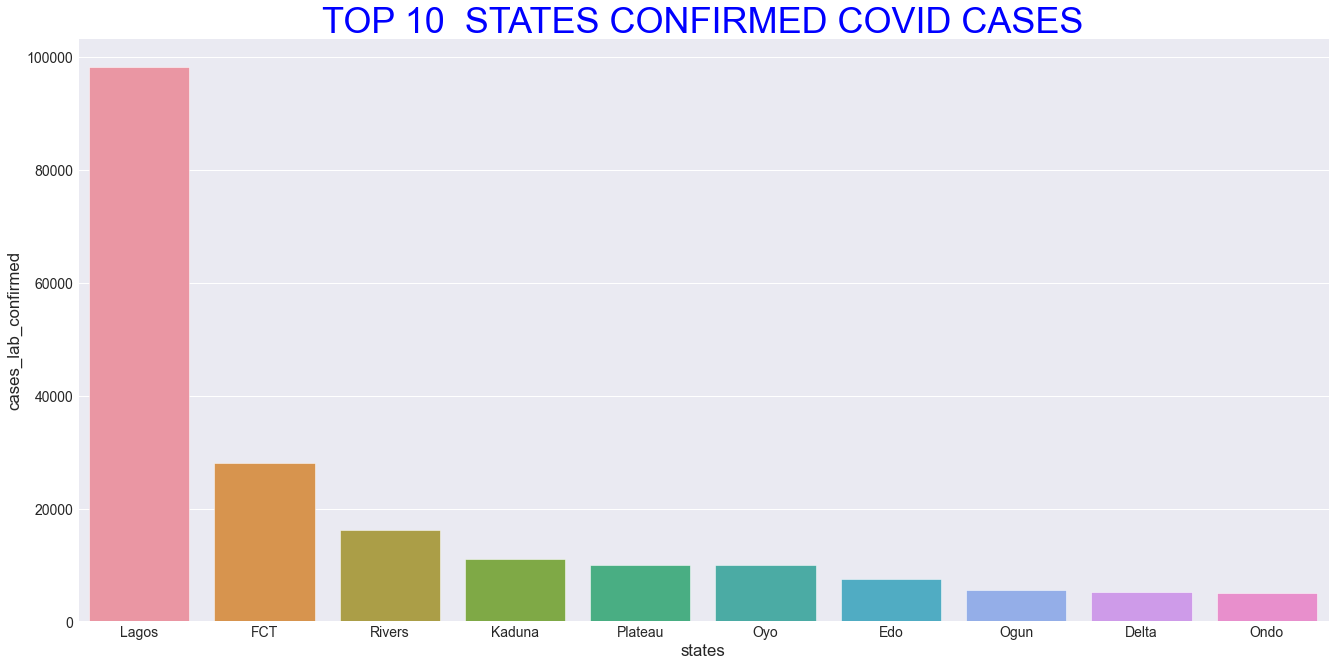

In [169]:
sns.set_style(style="darkgrid")
tips = t_10
d = plt.figure(figsize=(20,10))
ax = sns.barplot(x="states", y="cases_lab_confirmed", data=tips)
plt.title(label= "TOP 10  STATES CONFIRMED COVID CASES", fontsize=36, color="blue")
sns.despine()

Top 3 Confirmed States - Lagos, Abuja and Rivers

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. Hint - Sort the values

In [170]:
# First we have to sort the dataset to get top 10 Discharged Covid cases
t_10_discharged = dfcov.sort_values(by=["discharged"], ascending = False)
t_10_discharged = t_10_discharged[:10]
t_10_discharged

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths
0,Lagos,98318,17483,80066,769
1,FCT,28165,947,26971,247
2,Rivers,16421,164,16103,154
3,Kaduna,11175,29,11058,88
4,Plateau,10227,3,10149,75
5,Oyo,10186,354,9631,201
6,Edo,7665,23,7322,320
7,Ogun,5795,18,5695,82
8,Delta,5321,40,5170,111
10,Kano,4916,87,4702,127


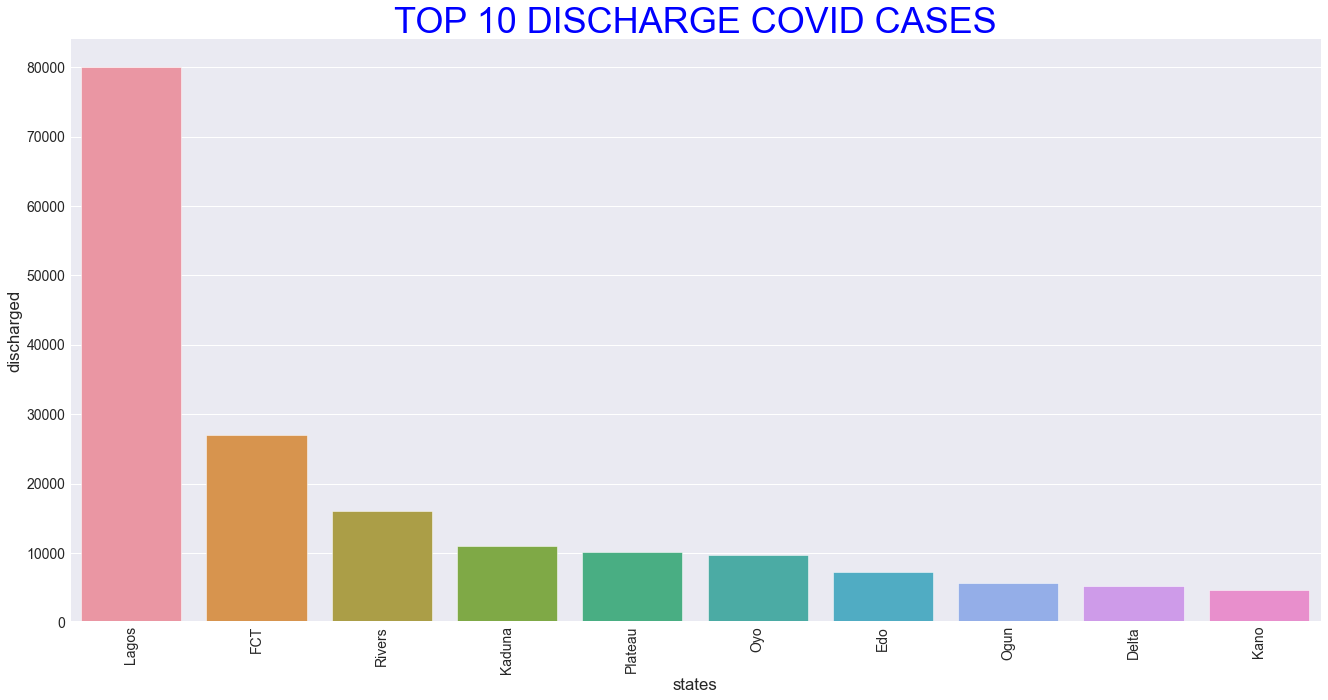

In [171]:
sns.set_style(style="darkgrid")
tips = t_10_discharged
d = plt.figure(figsize=(20,10))
ax = sns.barplot(x="states", y="discharged", data=tips)
plt.xticks(rotation = 90)
plt.title(label= "TOP 10 DISCHARGE COVID CASES", fontsize=36, color="blue")
sns.despine()

Top 3 state with discharge case - Lagos, Abuja and Rivers

TODO C: Plot the top 10 active cases

In [172]:
# To do this, we first need to Sort the ncdc_data by LAb Confirmed cases
t_10_active = dfcov.sort_values(by=["cases_on_admission"], ascending = False)
t_10_active = t_10_active[:10]
t_10_active

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths
0,Lagos,98318,17483,80066,769
1,FCT,28165,947,26971,247
5,Oyo,10186,354,9631,201
9,Ondo,5124,344,4673,107
21,Benue,2129,340,1764,25
17,Nasarawa,2701,317,2345,39
12,Kwara,4541,302,4175,64
2,Rivers,16421,164,16103,154
29,Niger,1142,124,998,20
18,Imo,2426,117,2252,57


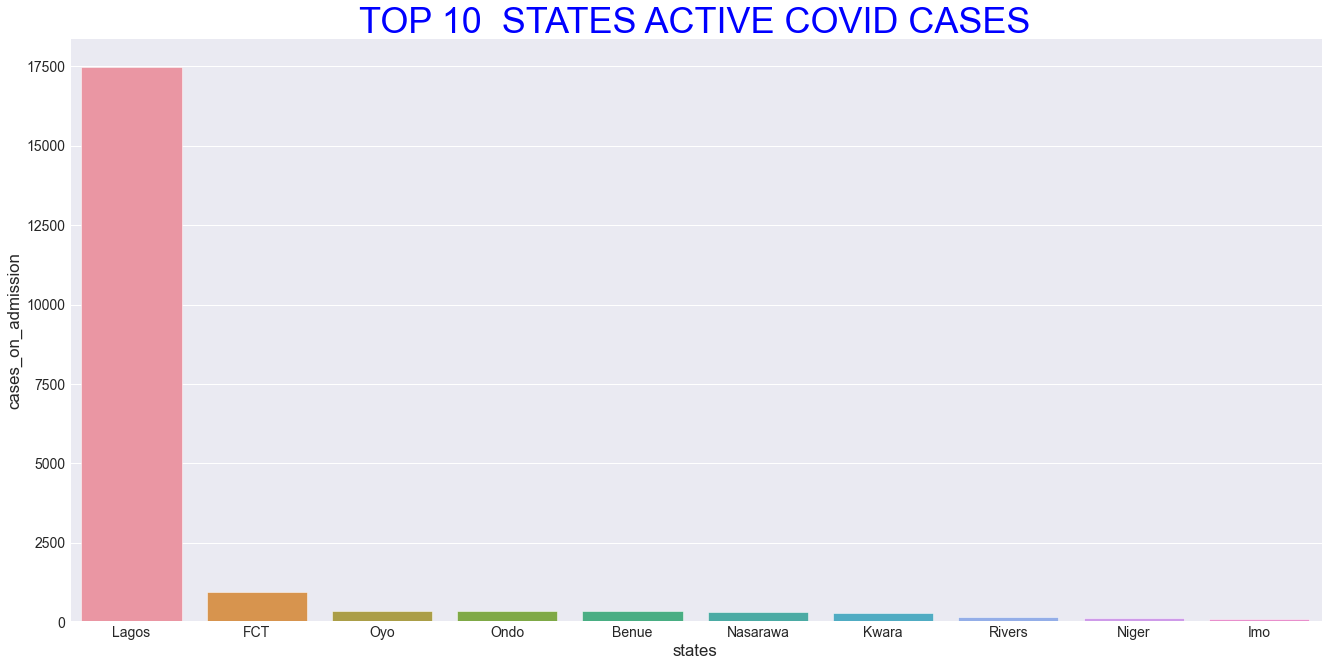

In [173]:
sns.set_style(style="darkgrid")
tips = t_10_active
d = plt.figure(figsize=(20,10))
ax = sns.barplot(x="states", y="cases_on_admission", data=tips)
plt.title(label= "TOP 10  STATES ACTIVE COVID CASES", fontsize=36, color="blue")
sns.despine()

The Top 3 active cases are LAGOS, FCT and OYO

TODO D - Plot the top 10 Death cases

In [174]:
# Sort by Death cases
t_10_deaths = dfcov.sort_values(by=["deaths"], ascending = False)
t_10_deaths = t_10_deaths[:10]
t_10_deaths

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths
0,Lagos,98318,17483,80066,769
6,Edo,7665,23,7322,320
1,FCT,28165,947,26971,247
5,Oyo,10186,354,9631,201
2,Rivers,16421,164,16103,154
10,Kano,4916,87,4702,127
8,Delta,5321,40,5170,111
9,Ondo,5124,344,4673,107
14,Osun,3261,67,3102,92
3,Kaduna,11175,29,11058,88


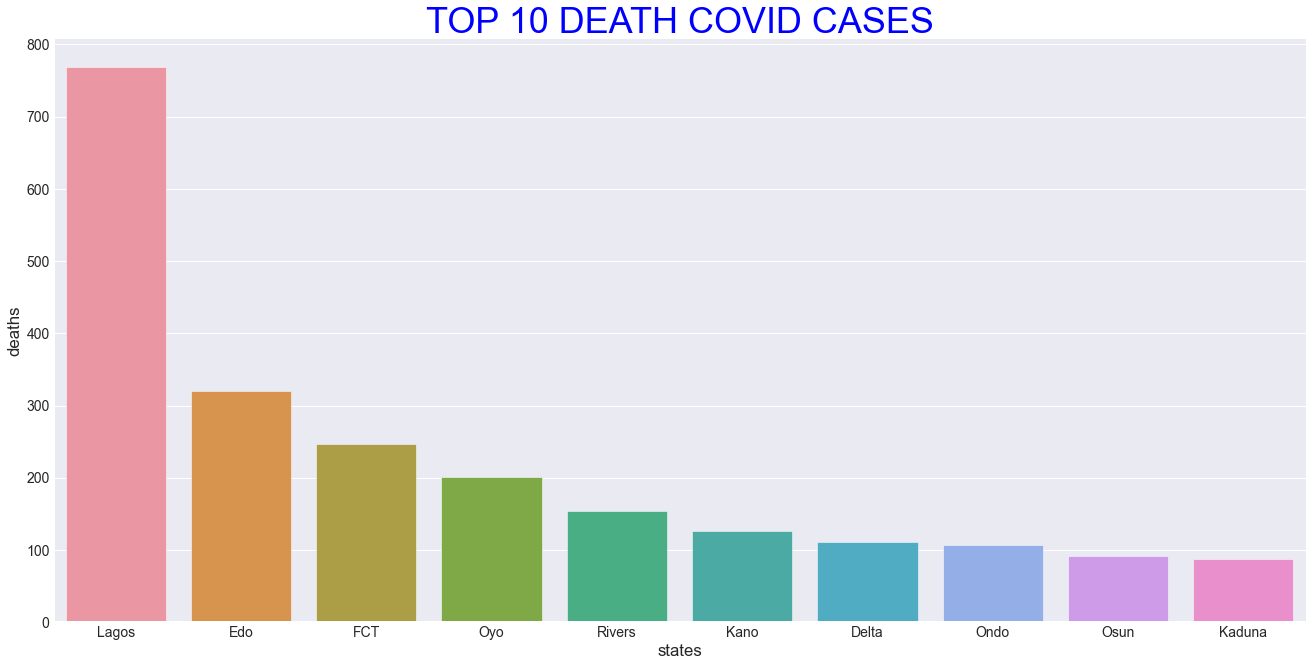

In [175]:
sns.set_style(style="darkgrid")
tips = t_10_deaths
d = plt.figure(figsize=(20,10))
ax = sns.barplot(x="states", y="deaths", data=tips)
plt.title(label= "TOP 10 DEATH COVID CASES", fontsize=36, color="blue")
sns.despine()

Top 3 states with death cases-Lagos, Edo and FCT(Abuja)

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

In [176]:
# Let's write a funtion to drop the no cases dates, which are the first 37 days 

def drop_nocases(var):
    var = var.drop(var.index[range(37)])
    var = var
    return var

In [177]:
confirmed_nig_ = drop_nocases(confirmed_nig)

In [178]:
# write function to plot line graph of daily cases
def lineplot_daily(data, title):
    sns.set_style(style="darkgrid")
    tip = data
    x= data["Date"]
    y= data["Cases"]

    d = plt.figure(figsize=(15,5))
    plt.title(label= title, fontsize=24, color="blue")
    sns.despine()

    sns.lineplot(x,y, sort = False)

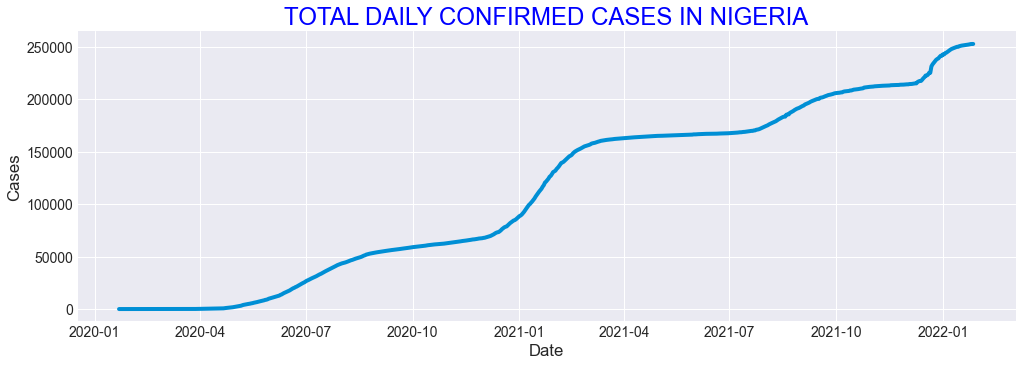

In [179]:
lineplot_daily(confirmed_nig, "TOTAL DAILY CONFIRMED CASES IN NIGERIA")

From the chart above, you will discover that there has been no case recorded until April 2020 and the confirmed case keep increasing till January 2022.

In [180]:
drop_nocases(recovered_nig)

,Date,Cases
37,2020-02-28,0
38,2020-02-29,0
39,2020-03-01,0
40,2020-03-02,0
41,2020-03-03,0
...,...,...
732,2022-01-23,0
733,2022-01-24,0
734,2022-01-25,0
735,2022-01-26,0


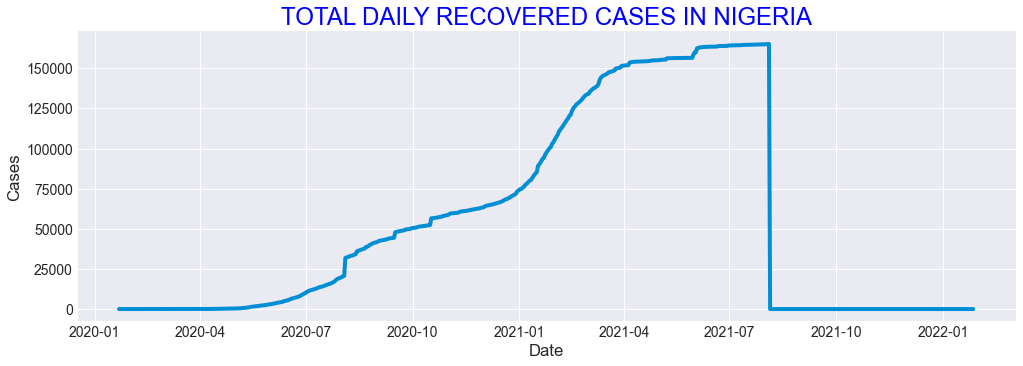

In [181]:

lineplot_daily(recovered_nig, "TOTAL DAILY RECOVERED CASES IN NIGERIA")

You can see that as the confirmed cases are increasing so the recovered cases until July 2021 where it drastically dropped.

In [182]:
drop_nocases(deaths_nig)

,Date,Cases
37,2020-02-28,0
38,2020-02-29,0
39,2020-03-01,0
40,2020-03-02,0
41,2020-03-03,0
...,...,...
732,2022-01-23,3124
733,2022-01-24,3126
734,2022-01-25,3133
735,2022-01-26,3134


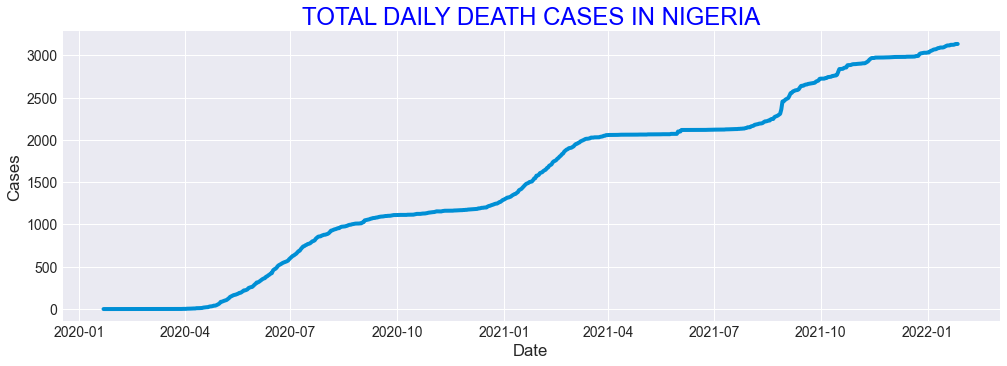

In [183]:
lineplot_daily(deaths_nig, "TOTAL DAILY DEATH CASES IN NIGERIA")

It can be seen from the charts that since the confirmed cases in April 2020, there is a fast increase in the death cases until july 2020 to january 2021, where it increased again to october 2021 and then still on the increase still date.

<AxesSubplot:title={'center':'TOTAL DAILY CONFIRMED, RECOVERED AND DEATH CASES'}, xlabel='Date', ylabel='Cases'>

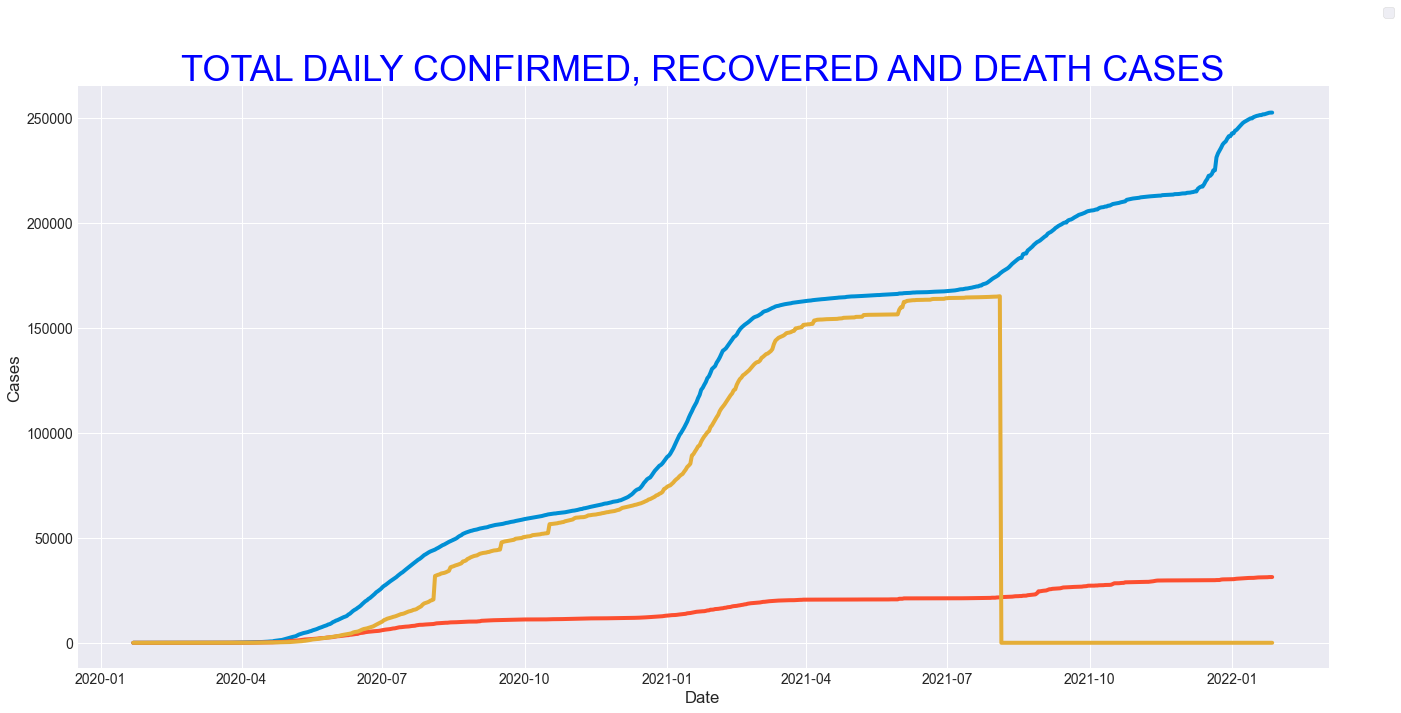

In [184]:
# Let's plot a combined line plot for Daily COnfirmed, Recovered and Death Cases

sns.set_style(style="darkgrid")
x= confirmed_nig["Date"]
y= confirmed_nig["Cases"]
v = recovered_nig["Cases"]
z = deaths_nig["Cases"]

d = plt.figure(figsize=(20,10))
d.legend(["Daily Infection", "Daily Recovered", "Daily Death"])
plt.title(label= "TOTAL DAILY CONFIRMED, RECOVERED AND DEATH CASES", fontsize=36, color="blue")
plt.legend = (["Daily Confirmed", "Daily Recovered", "Daily Death"])
sns.despine()



sns.lineplot(x,y, sort = False)
sns.lineplot(x,10*z, sort = False)
sns.lineplot(x,v, sort = False)

TODO F - 
* Determine the daily infection rate, you can use the Pandas `diff` method to find the derivate of the total cases.
* Generate a line plot for the above

In [185]:
confirmed_nig_ = drop_nocases(confirmed_nig)

In [186]:
confirmed_nig_diff = confirmed_nig_["Cases"].diff()

In [187]:
confirmed_nig_diff

37       NaN
38       0.0
39       0.0
40       0.0
41       0.0
       ...  
732    228.0
733    241.0
734    250.0
735     75.0
736      0.0
Name: Cases, Length: 700, dtype: float64

In [188]:
confirmed_nig_diff = confirmed_nig_diff.to_frame()

In [189]:
confirmed_nig_diff

,Cases
37,NaN
38,0.0
39,0.0
40,0.0
41,0.0
...,...
732,228.0
733,241.0
734,250.0
735,75.0


In [190]:
confirmed_nig_["Daily Cases"] = confirmed_nig_diff

In [191]:
confirmed_nig_

,Date,Cases,Daily Cases
37,2020-02-28,1,NaN
38,2020-02-29,1,0.0
39,2020-03-01,1,0.0
40,2020-03-02,1,0.0
41,2020-03-03,1,0.0
...,...,...,...
732,2022-01-23,252187,228.0
733,2022-01-24,252428,241.0
734,2022-01-25,252678,250.0
735,2022-01-26,252753,75.0


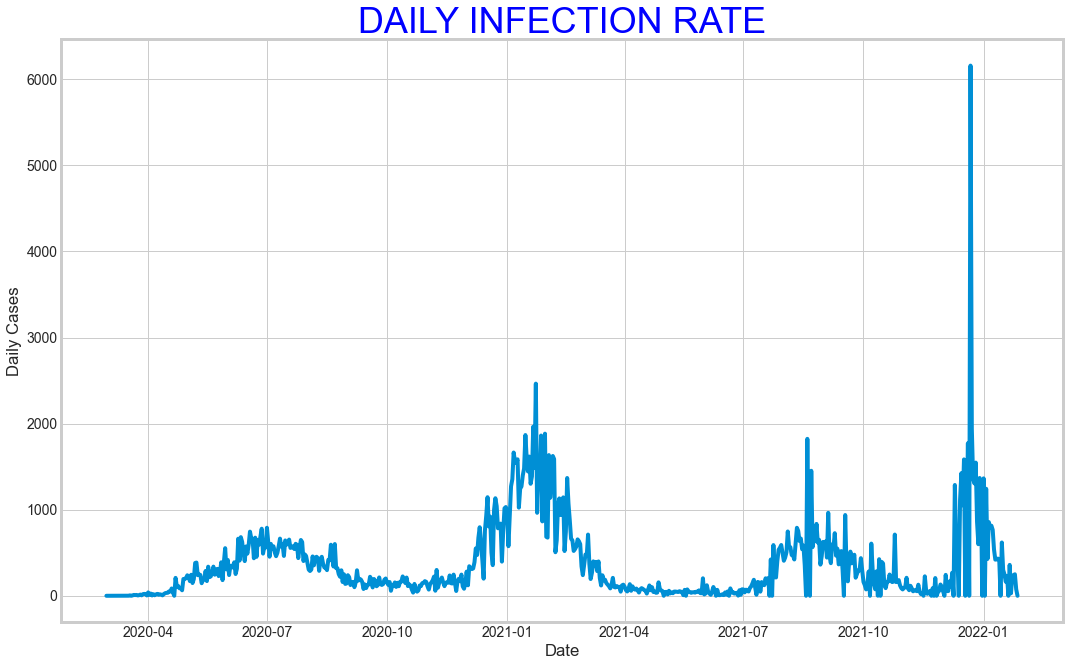

In [192]:
#Line Plot of Daily Cases

x = confirmed_nig_["Date"]
y = confirmed_nig_["Daily Cases"]

sns.set_style(style="whitegrid")
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(10)
plt.xlabel("Date")
plt.ylabel("Daily Cases")
plt.title(label="DAILY INFECTION RATE", fontsize=36, color="blue")
plt.xticks()
#plt.xlim()

plt.plot(x, y, label = "DAILY INFECTION")
plt.show()

 There was an increase in the infection rate around April 2020, which went up in at July 2020, dropped in october 2020 and picked up again at July 2021 and again dropped again october 2021 .The maximum figure can be observed to be around January 2022,It is really important that people continue keep to the preventive measures during this period. And an observation that the virus picks up at July and January shows it is affected by the weather.

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [193]:
# Let's write a function that checks for maximum value in a column
# The function takes in dataset and 'column value
def _max(data, col):
    max = data.nlargest(1, col)
    return max

In [194]:
#Maximum Daily Infection
_max(confirmed_nig_, "Daily Cases")

,Date,Cases,Daily Cases
700,2021-12-22,231413,6158.0


The maximum infection rate was recorded on 22nd of December, 2021. Meaning there were 6158 new cases on that day

TODO H - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.
<br>
Steps
* Combine the two dataset together on a common column(states)
* Create a new dataframe for plotting. This DataFrame will contain top 10 states in terms of confirmed cases i.e sort by confirmed cases. ** Hint: Check out Pandas [nlargest](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html) function. This [tutorial](https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/) can help out ** 
* Plot both variable on the same axis. Check out this [tutorial](http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/)

In [195]:
#Combine the two dataset using merge() method on a common column states
df_join = pd.merge(dfcov, df_external_data, how='outer', on= ['states'])

In [196]:
df_join

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,98318.0,17483.0,80066.0,769.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,28165.0,947.0,26971.0,247.0,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,16421.0,164.0,16103.0,154.0,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11175.0,29.0,11058.0,88.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Plateau,10227.0,3.0,10149.0,75.0,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
5,Oyo,10186.0,354.0,9631.0,201.0,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
6,Edo,7665.0,23.0,7322.0,320.0,South South,4705000.0,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,5795.0,18.0,5695.0,82.0,South West,5878000.0,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Delta,5321.0,40.0,5170.0,111.0,South South,6303000.0,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08
9,Ondo,5124.0,344.0,4673.0,107.0,South West,5185000.0,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04


In [197]:
#Get the top 10 based on confirmed cases using nlargest() method
df_t_10_cases = df_join.nlargest(11, 'cases_lab_confirmed')
df_t_10_cases

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,98318.0,17483.0,80066.0,769.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,28165.0,947.0,26971.0,247.0,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,16421.0,164.0,16103.0,154.0,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11175.0,29.0,11058.0,88.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Plateau,10227.0,3.0,10149.0,75.0,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
5,Oyo,10186.0,354.0,9631.0,201.0,South West,8737000.0,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
6,Edo,7665.0,23.0,7322.0,320.0,South South,4705000.0,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,5795.0,18.0,5695.0,82.0,South West,5878000.0,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Delta,5321.0,40.0,5170.0,111.0,South South,6303000.0,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08
9,Ondo,5124.0,344.0,4673.0,107.0,South West,5185000.0,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04


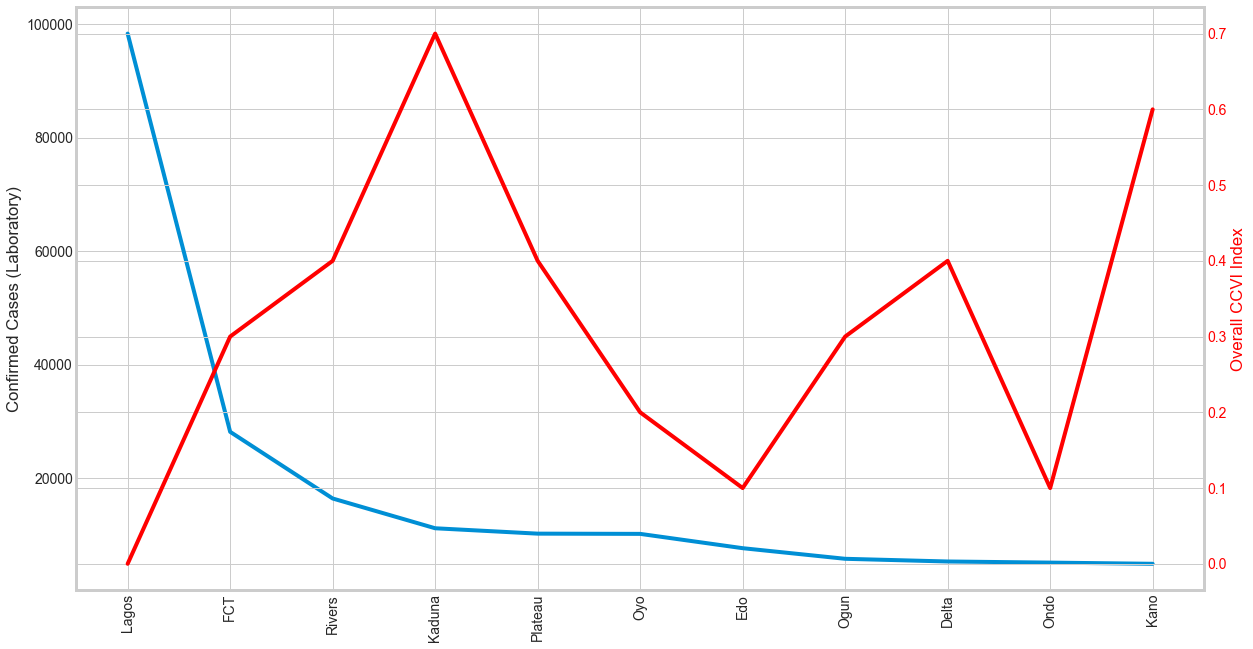

In [198]:
#Plot Map of Overral CCVI Index

fig = plt.figure()
fig.set_figwidth(18)
fig.set_figheight(10)
ax1 = fig.add_subplot(111)
ax1.plot(df_t_10_cases['states'], df_t_10_cases['cases_lab_confirmed'])
ax1.set_ylabel('Confirmed Cases (Laboratory)')
ax2 = ax1.twinx()
ax2.plot(df_t_10_cases['states'], df_t_10_cases['Overall CCVI Index'], 'r-')
ax2.set_ylabel('Overall CCVI Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
plt.show()


Write Your Observation Here

Observation
You will notice that the states with the highest vulnerability index score in relation to the confirmed cases are Northern states(Kaduna and Kano) with weak health systems, more poverty etc. Lagos has a high number of confirmed cases but has less vulnerability index score because of good health system, more social distancing etc.

TODO I - Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
* Here you will generate a regression plot between two variables to visualize the linear relationships - Confirmed Cases and Population Density.
Hint: Check out Seaborn [Regression Plot](https://seaborn.pydata.org/generated/seaborn.regplot.html).
* Provide a summary of your observation

<AxesSubplot:title={'center':'REGRESSION PLOT BETWEEN CONFIRMED CASES AND POPULATION DENSITY'}, xlabel='Population Density', ylabel='cases_lab_confirmed'>

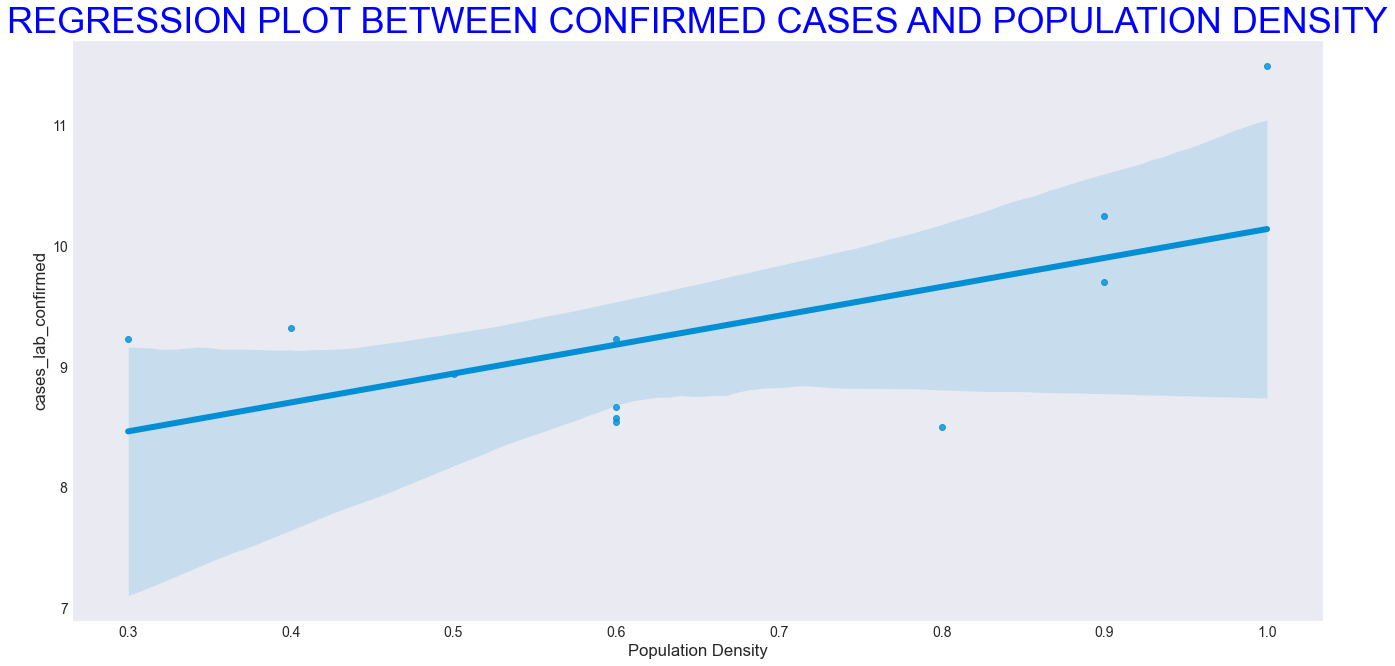

In [199]:
sns.set_style("dark")
d = plt.figure(figsize=(20,10))
plt.title(label="REGRESSION PLOT BETWEEN CONFIRMED CASES AND POPULATION DENSITY", fontsize=36, color="blue")
sns.regplot(df_t_10_cases['Population Density'], np.log(df_t_10_cases['cases_lab_confirmed']))

Observation

The regression plot shows the distribution of confirmed cases in relation to Population Desnsity.

TODO J - 
* Provide more analyses by extending TODO G & H. Meaning, determine relationships between more features.
* Provide a detailed summary of your findings. 
* Note that you can have as many as possible.

### Map of Percent Budget Change

In [200]:
# Preview data
budget_data = pd.read_csv("Budget data.csv")
budget_data.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [201]:
#Budget Chage
budget_change = []
for index, row in budget_data.iterrows():
    diff = row[1] - row[2]
    budget_change.append(diff) 

In [202]:
budget_data["Budget_change (Bn)"] = budget_change
budget_data.head()

,states,Initial_budget (Bn),Revised_budget (Bn),Budget_change (Bn)
0,Abia,136.60,102.70,33.90
1,Adamawa,183.30,139.31,43.99
2,Akwa-Ibom,597.73,366.00,231.73
3,Anambra,137.10,112.80,24.30
4,Bauchi,167.20,128.00,39.20


In [203]:
#Percentage budget change
percent_bc = []
for index, row in budget_data.iterrows():
    perc = (row[3]/row[1]) * 100
    perc2 = round(perc, 2)
    percent_bc.append(perc2)
    
budget_data["Percent_budget_change"] = percent_bc
budget_data.head()

,states,Initial_budget (Bn),Revised_budget (Bn),Budget_change (Bn),Percent_budget_change
0,Abia,136.60,102.70,33.90,24.82
1,Adamawa,183.30,139.31,43.99,24.00
2,Akwa-Ibom,597.73,366.00,231.73,38.77
3,Anambra,137.10,112.80,24.30,17.72
4,Bauchi,167.20,128.00,39.20,23.44


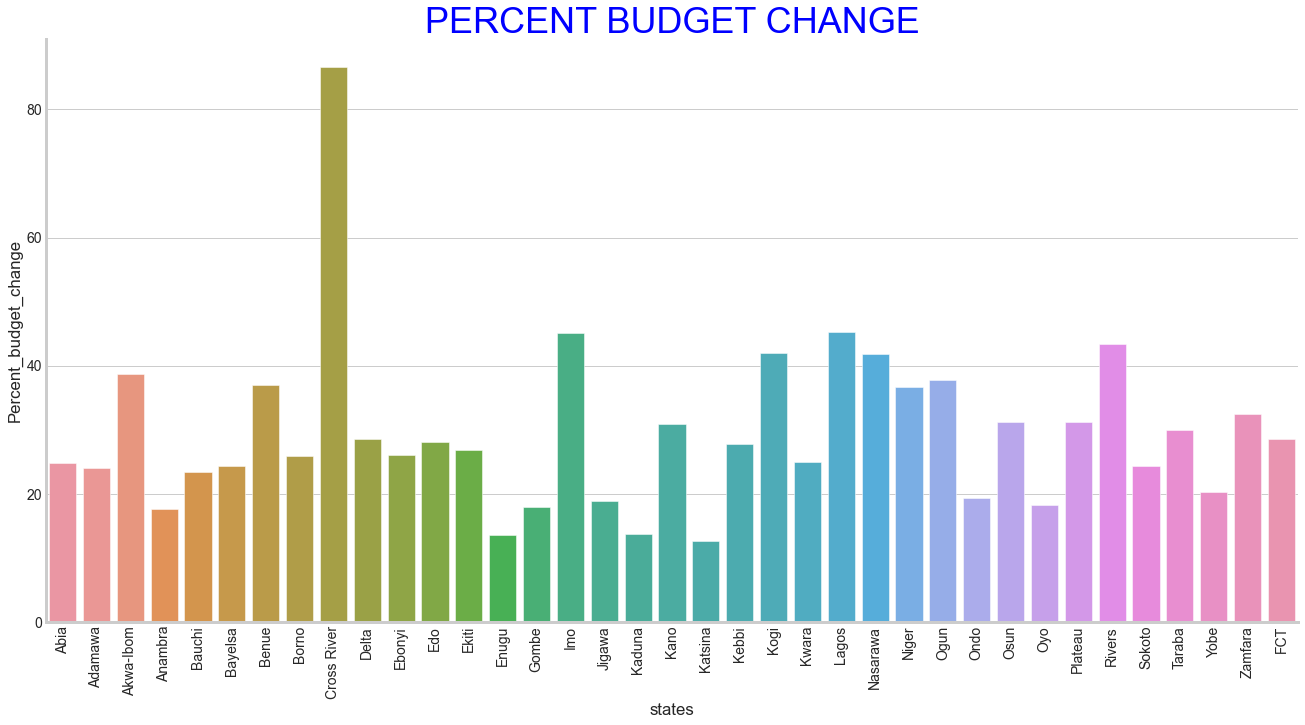

In [204]:
#Bar Plot of Percent data change
sns.set_style(style="whitegrid")
tips = budget_data
d = plt.figure(figsize=(20,10))
ax = sns.barplot(x="states", y="Percent_budget_change", data=tips)
plt.title(label= "PERCENT BUDGET CHANGE", fontsize=36, color="blue")
plt.xticks(rotation = 90)
sns.despine()


Observation

This shows the the percent change in the budget for each state. Cross River has the highest budget change of almost 90% change, which is very questionable. In my Opinion, this could be an error in data record or simply an outlier.

In [205]:
df_join.head()

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,98318.0,17483.0,80066.0,769.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,28165.0,947.0,26971.0,247.0,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,16421.0,164.0,16103.0,154.0,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11175.0,29.0,11058.0,88.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Plateau,10227.0,3.0,10149.0,75.0,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93


In [206]:
dfjoin = df_join.reset_index()
dfjoin.head()

,index,states,cases_lab_confirmed,cases_on_admission,discharged,deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,0,Lagos,98318.0,17483.0,80066.0,769.0,South West,13992000.0,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,1,FCT,28165.0,947.0,26971.0,247.0,North Central,4865000.0,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,2,Rivers,16421.0,164.0,16103.0,154.0,South South,7763000.0,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,3,Kaduna,11175.0,29.0,11058.0,88.0,North West,9227000.0,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,4,Plateau,10227.0,3.0,10149.0,75.0,North Central,4766000.0,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93


In [207]:
#create a new table with data we need 
new_data = []

new_data = pd.DataFrame(dfjoin, columns = ["region", "states", "cases_lab_confirmed", "Population"])

new_data.head()

,region,states,cases_lab_confirmed,Population
0,South West,Lagos,98318.0,13992000.0
1,North Central,FCT,28165.0,4865000.0
2,South South,Rivers,16421.0,7763000.0
3,North West,Kaduna,11175.0,9227000.0
4,North Central,Plateau,10227.0,4766000.0


In [208]:
#Group by Region
gp = new_data.groupby(['region', "states"], as_index=True).sum()

In [209]:
gp

cases_lab_confirmed  Population
region        states                                      
North Central Benue                     2129.0   6376000.0
              FCT                      28165.0   4865000.0
              Kogi                         5.0   4970000.0
              Kwara                     4541.0   3524000.0
              Nassarawa                    0.0   2783000.0
              Niger                     1142.0   6260000.0
              Plateau                  10227.0   4766000.0
North East    Adamawa                   1203.0   4672000.0
              Bauchi                    1936.0   7270000.0
              Borno                     1629.0   6651000.0
              Gombe                     3270.0   3692000.0
              Taraba                    1469.0   3387000.0
              Yobe                       502.0   3723000.0
North West    Jigawa                     664.0   6435000.0
              Kaduna                   11175.0   9227000.0
              Kano                      4916.0  14726000.0
              Katsina                   2399.0   8713000.0
              Kebbi                      480.0   4968000.0
              Sokoto                     811.0   5612000.0
              Zamfara                    375.0   4974000.0
South East    Abia                      2152.0   4190000.0
              Akwa Ibom                    0.0   6093000.0
              Anambra                   2743.0   6050000.0
              Enugu                     2952.0   4801000.0
              Imo                       2426.0   6018000.0
South South   Bayelsa                   1305.0   2606000.0
              Cross river                  0.0   4272000.0
              Delta                     5321.0   6303000.0
              Ebonyi                    2064.0   3192000.0
              Edo                       7665.0   4705000.0
              Rivers                   16421.0   7763000.0
South West    Ekiti                     1978.0   3593000.0
              Lagos                    98318.0  13992000.0
              Ogun                      5795.0   5878000.0
              Ondo                      5124.0   5185000.0
              Osun                      3261.0   5252000.0
              Oyo                      10186.0   8737000.0

In [210]:
#Extract table dropping the States column
dp = new_data.groupby(['region'], as_index=True).sum()
dp

,cases_lab_confirmed,Population
region,,
North Central,46209.0,33544000.0
North East,10009.0,29395000.0
North West,20820.0,54655000.0
South East,10273.0,27152000.0
South South,32776.0,28841000.0
South West,124662.0,42637000.0


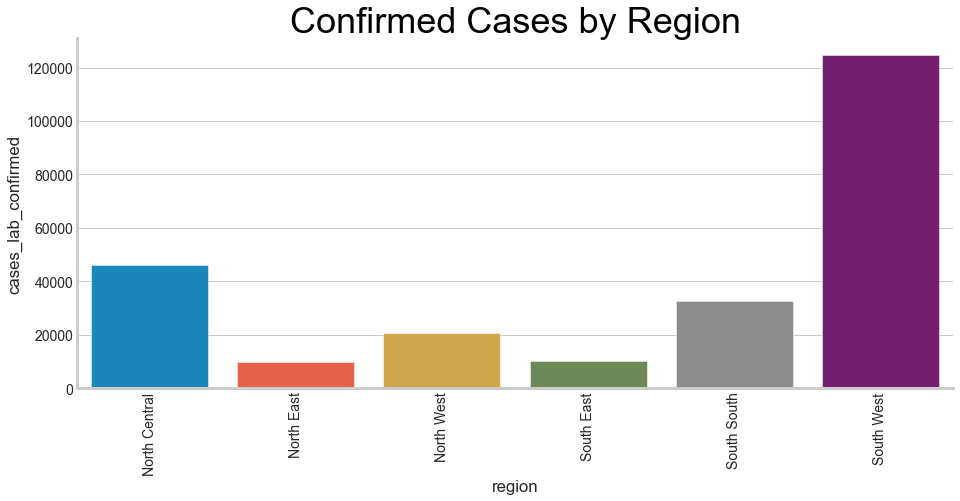

In [211]:
#Plot chart of Confirmed cases by region
sns.set_style(style="whitegrid")
tips = dp
ind = dp.index
d = plt.figure(figsize=(14,6))
ax = sns.barplot(x=ind, y="cases_lab_confirmed", data=tips)
plt.title(label= "Confirmed Cases by Region", fontsize=36, color="black")
plt.xticks(rotation = 90)
sns.despine()


Observation

This map shows the distribution of the covid cases by region in the country, indicating that the South-West region has the highest number of cases followed by North Central.

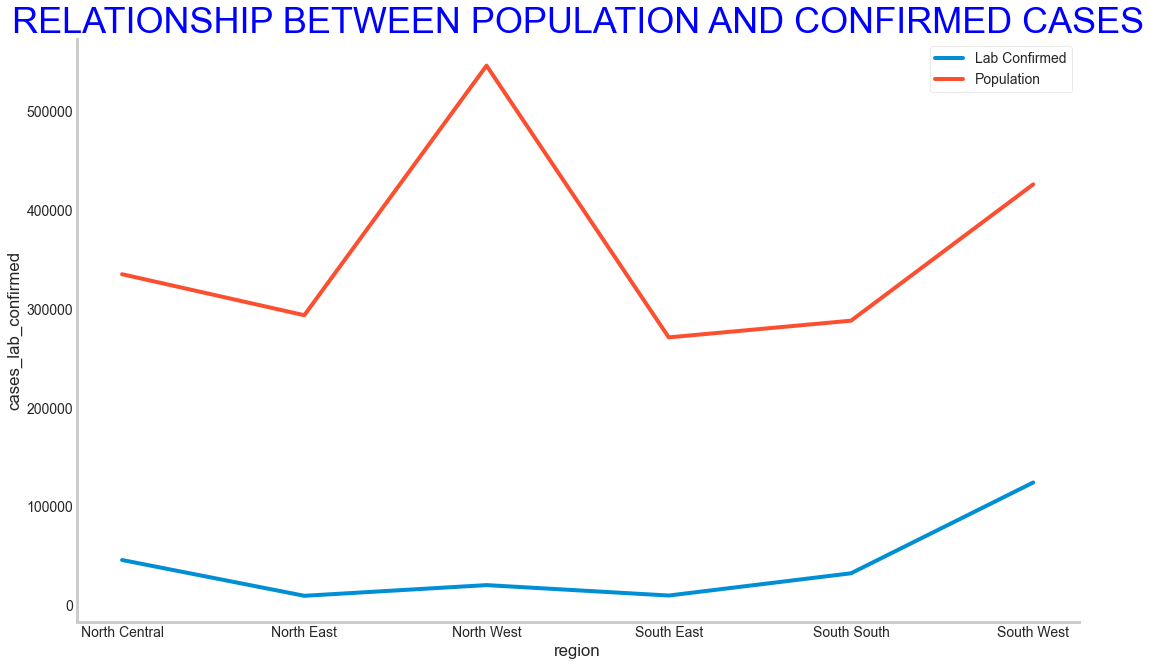

In [212]:
# Line map showing Population and confirmed cases

y = dp["cases_lab_confirmed"]
x = dp.index
z = dp["Population"]


d = plt.figure(figsize=(16,10))
plt.grid()

fii = sns.lineplot(x, y, data = dp, sort = False)
plt.title(label="RELATIONSHIP BETWEEN POPULATION AND CONFIRMED CASES", fontsize=36, color="blue")
sns.lineplot(x, z/100, data = dp, sort = False)
fii.legend(["Lab Confirmed", "Population"])
sns.despine()

Observation

This map shows the relationship between population and confirmed cases. It shows a direct relationship between population and confirmed cases.

### TODO L - 
Determine the effect of the Pandemic on the economy. To do this, you will compare the Real GDP value Pre-COVID-19 with Real GDP in 2020 (COVID-19 Period, especially Q2 2020)
<br>
Steps
* From the Real GDP Data, generate a `barplot` using the GDP values for each year & quarters. For example: On x-axis you will have year 2017 and the bars will be values of each quarters(Q1-Q4). You expected to have subplots of each quarters on one graph.
<br>
Hint: Use [Pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to create your plot DataFrame 
* Set your quarter legend to lower left.
* Using `axhline`, draw a horizontal line through the graph at the value of Q2 2020.
* Write out your observation

In [213]:
#let's preview the data
df_readgdp_data

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [214]:
#melt the data
melted = df_readgdp_data.melt(id_vars ="Year")
melted

,Year,variable,value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


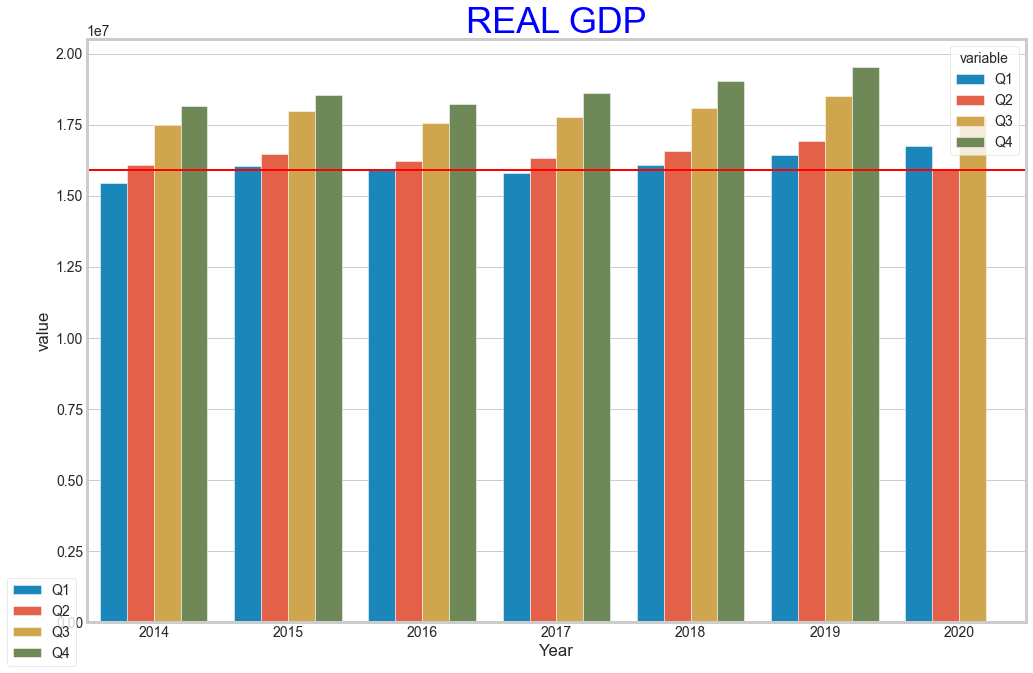

In [215]:
#sns.set_style("white")
d = plt.figure(figsize=(15,10))
graph = sns.barplot(data = melted, x = "Year", y = "value", hue = "variable")
plt.title(label="REAL GDP", fontsize=36, color="blue")
graph.axhline(y = 15890000.00, linewidth = 2, color = "r")
#plt.grid()
d.legend(loc="lower left")
plt.show()

Observation

Map showing the real GDP of the country from 2014 - 2020. The map indicates that the the covid period (Second quarter Q2) of 2020 recorded the lowest Q2 from 2014 - 2020. This indicates the negative impact of the covid era on the economy

 

In [216]:
dfcov

,states,cases_lab_confirmed,cases_on_admission,discharged,deaths
0,Lagos,98318,17483,80066,769
1,FCT,28165,947,26971,247
2,Rivers,16421,164,16103,154
3,Kaduna,11175,29,11058,88
4,Plateau,10227,3,10149,75
5,Oyo,10186,354,9631,201
6,Edo,7665,23,7322,320
7,Ogun,5795,18,5695,82
8,Delta,5321,40,5170,111
9,Ondo,5124,344,4673,107


In [217]:
melted = dfcov.melt()
melted

,variable,value
0,states,Lagos
1,states,FCT
2,states,Rivers
3,states,Kaduna
4,states,Plateau
...,...,...
180,deaths,18
181,deaths,9
182,deaths,16
183,deaths,9


### Note: Do not limit your analysis to the provided TODOs. Perform more analyses e.g 
* Check for more external dataset
* Ask more questions & find the right answers by exploring the data